#Importing_Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading_dataset
- you can get this datset from kaggle

In [2]:
dataset=pd.read_csv('/content/Rainfall.csv')

In [3]:
dataset.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


- before doing any EDA we can clearly see that the rainfall needs to be 0 or 1 insttead of yes - No

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


- as the dataset is from kaggle so it is mostly in good state a part from some minor issues  but  it is always a good idea to cross check

- a small problem with the winddirection name

In [5]:
dataset.columns=dataset.columns.str.strip()

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [7]:
dataset.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,365.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.506849,21.536986
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.723724,10.069712
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.700000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.900000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


In [8]:
dataset.duplicated().sum()

np.int64(0)

In [9]:
dataset.isnull().sum()

,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0


- do u think that day ofr tthe month have any contribution to rainfall? i guess no is the answer

In [10]:
dataset['day']

,day
0,1
1,2
2,3
3,4
4,5
...,...
361,27
362,28
363,29
364,30


In [11]:
dataset=dataset.drop(columns=['day'])

In [12]:
dataset.tail()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


- handling the missing values

In [13]:
dataset['winddirection']=dataset['winddirection'].fillna(dataset['winddirection'].mode()[0])

In [14]:
dataset['winddirection'].isnull().sum()

np.int64(0)

In [15]:
dataset['windspeed']=dataset['windspeed'].fillna(dataset['windspeed'].median())

In [16]:
dataset['winddirection'].isnull().sum()

np.int64(0)

- now converting Yes and No to 0 and 1

In [17]:
dataset['rainfall']=dataset['rainfall'].map({'yes':1,'no':0})

In [18]:
dataset['rainfall']

,rainfall
0,1
1,1
2,1
3,1
4,1
...,...
361,1
362,1
363,1
364,1


#Exploratory Data Analysis

In [19]:
dataset.shape

(366, 11)

In [20]:
dataset.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

- as my plan is to work with random forest so it doesnot need any specific distribution

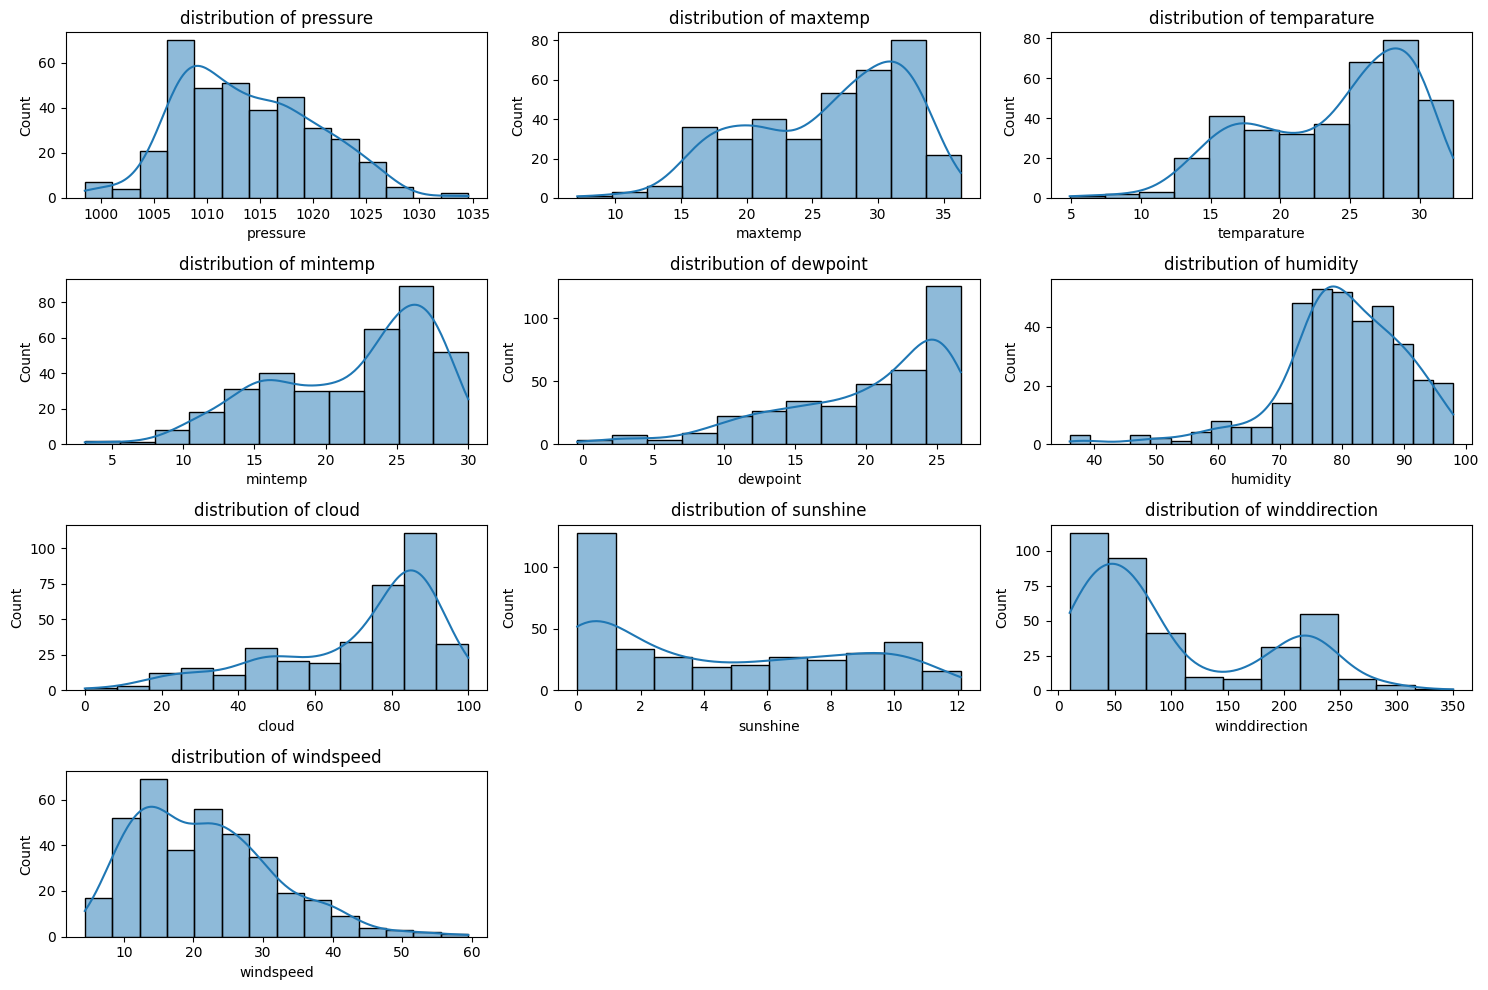

In [21]:
plt.figure(figsize=(15,10))

for i,column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine', 'winddirection', 'windspeed'],1):
  plt.subplot(4,3,i)
  sns.histplot(dataset[column],kde=True)
  plt.title(f"distribution of {column}")

plt.tight_layout()
plt.show()

- it  is clear that the data is unbalanced which is not a good thing so we have to go for resampling

<Axes: xlabel='rainfall'>

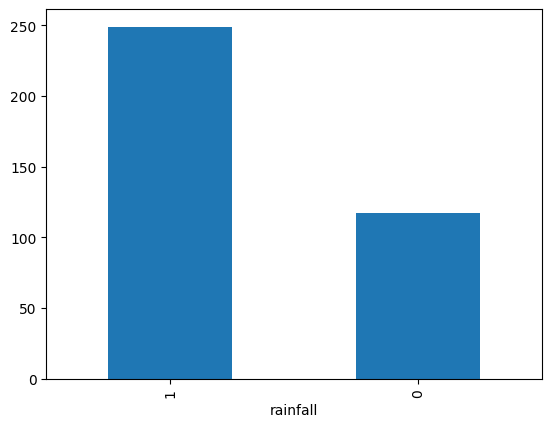

In [22]:
dataset['rainfall'].value_counts().plot(kind='bar')

#Correlation

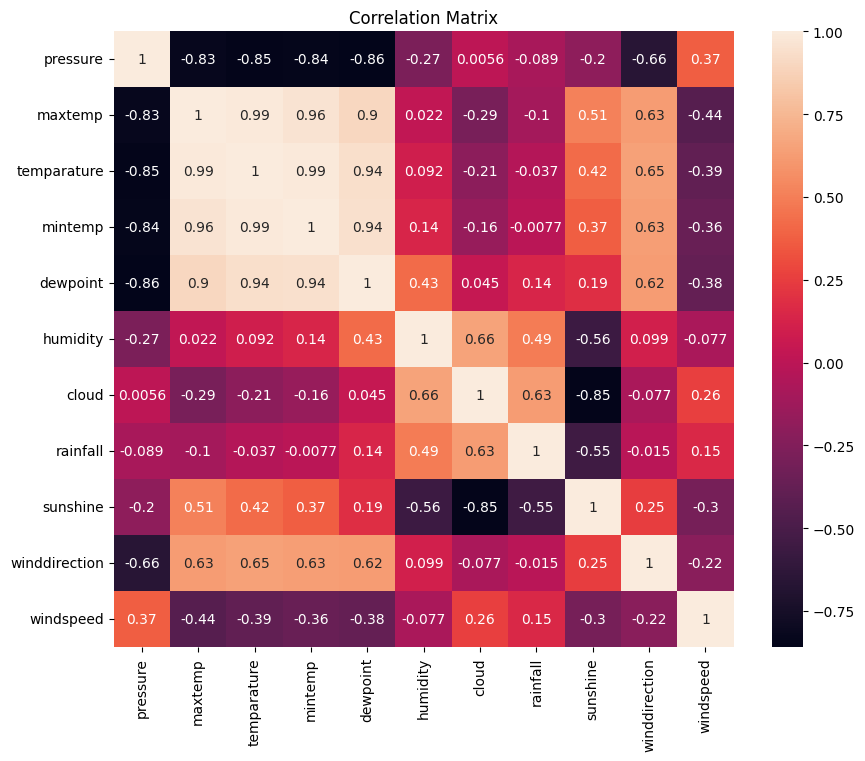

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(),annot=True)
plt.title('Correlation Matrix')
plt.show()

- from the heatmap it is evidant that there is a factor of multicollinearity like  somme columns are  highly effecting each other which is a bad thing

#Checking_Outliers

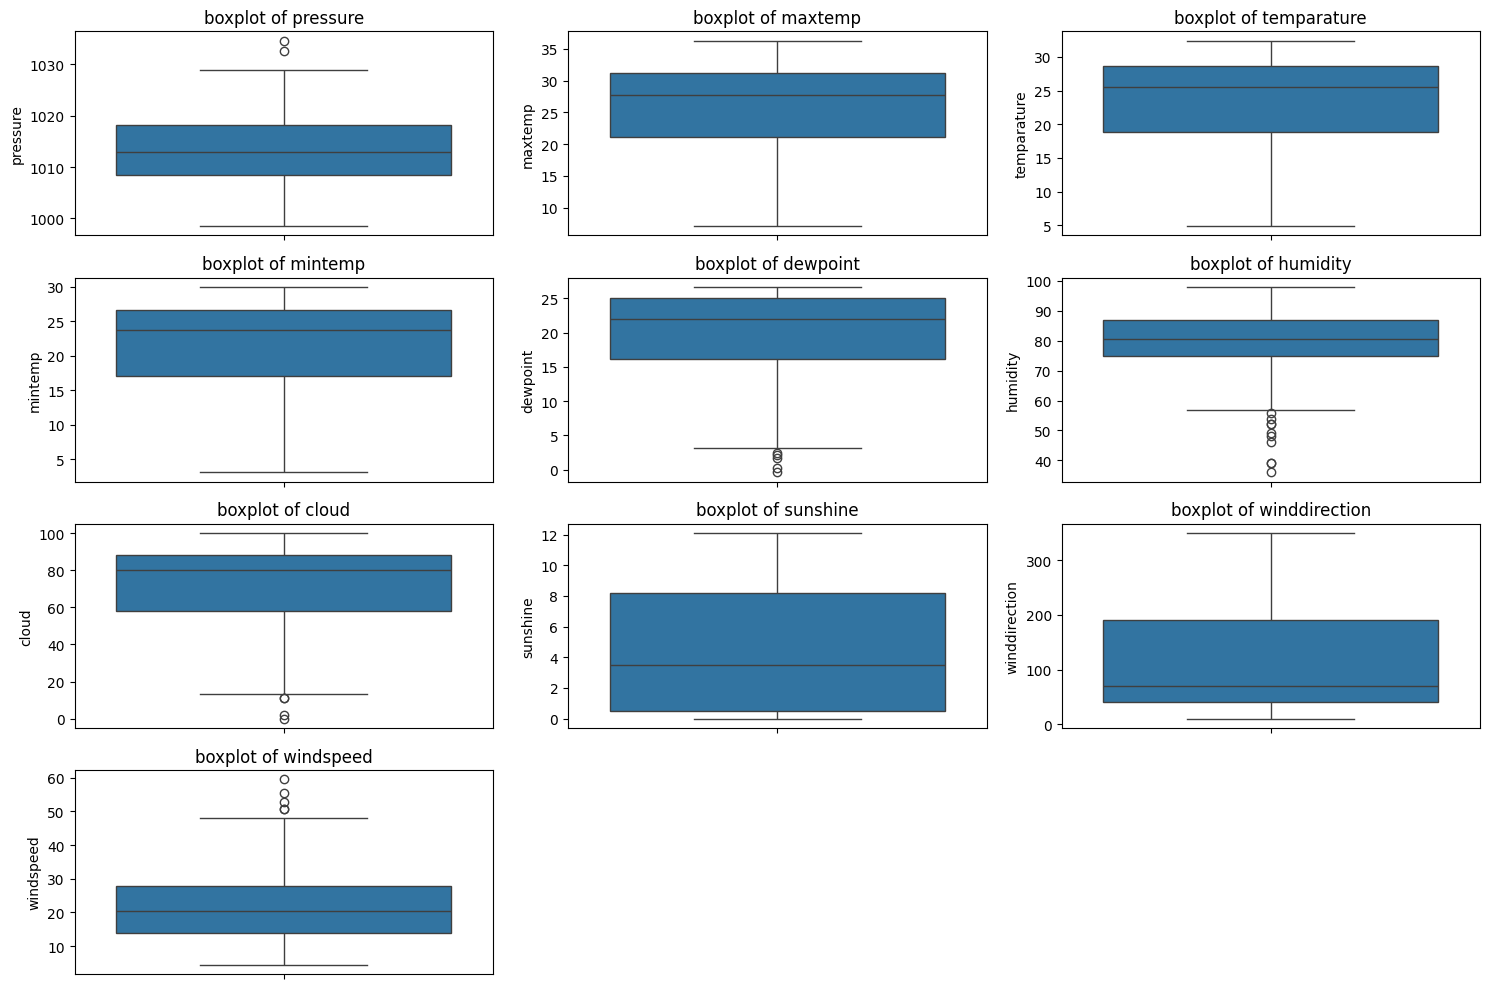

In [24]:
plt.figure(figsize=(15,10))

for i,column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine', 'winddirection', 'windspeed'],1):
  plt.subplot(4,3,i)
  sns.boxplot(dataset[column])
  plt.title(f"boxplot of {column}")

plt.tight_layout()
plt.show()

- there seems to be a bit issue with the humidity column lets try to fix that

In [25]:
(dataset['humidity']<60).sum()

np.int64(16)

- its not that much plus there increased gradually

#Fixing_problems

In [26]:
#dropping the highly correlated columns

In [27]:
dataset=dataset.drop(columns=['maxtemp','mintemp','temparature'])

In [28]:
dataset.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


In [29]:
# lets do the resampling

In [30]:
from sklearn.utils import resample

In [31]:
majority=dataset[dataset['rainfall']==1]
minority=dataset[dataset['rainfall']==0]

In [32]:
majority.shape

(249, 8)

In [33]:
minority.shape

(117, 8)

In [34]:
#lets downsample the majority class

In [35]:
downsampled_majority=resample(majority,replace=False,n_samples=minority.shape[0],random_state=42)

In [36]:
downsampled_majority.shape

(117, 8)

In [37]:
df_downsampled=pd.concat([downsampled_majority,minority])

In [38]:
#now thw data is in a sequence and it would have the prevvious indexes so lets shuffle it and fix the indexes

In [39]:
df_downsampled=df_downsampled.sample(frac=1,random_state=42).reset_index(drop=True)

In [40]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1022.2,14.1,78,90,1,0.0,30.0,28.5
1,1013.4,19.5,69,17,0,10.5,70.0,12.4
2,1006.1,24.4,74,27,0,10.8,220.0,8.7
3,1007.6,24.8,85,84,1,1.8,70.0,34.8
4,1021.2,8.4,66,18,0,10.1,20.0,24.4


In [41]:
df_downsampled['rainfall'].value_counts()

,count
rainfall,
1,117
0,117


#Modellbuilding

In [52]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from xgboost import XGBClassifier

In [43]:
X=df_downsampled.drop(columns=['rainfall'])
y=df_downsampled['rainfall']

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [45]:
models={'randomforest':RandomForestClassifier(random_state=42),
        'logistic_regression':LogisticRegression(random_state=42,max_iter=500),
        "XGBoost":XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        "SVC": SVC(probability=True)
        }

In [46]:
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results[name] = scores.mean()

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:21:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:21:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:21:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:21:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:21:17] WARNING: /w

In [47]:
print("Model Comparison:")
for k, v in results.items():
    print(f"{k}: {v:.4f}")

Model Comparison:
randomforest: 0.8026
logistic_regression: 0.8189
XGBoost: 0.7760
SVC: 0.6000


apparently logistic regression and random forest both arre doing well lets train both

In [48]:
rf_model=RandomForestClassifier(random_state=42)


In [54]:
param_dist = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': [None] + list(np.arange(5, 50, 5)),
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 10, 1),
    'max_features': ['sqrt', 'log2']
}


In [55]:
rf_cv=RandomizedSearchCV(estimator=rf_model,param_distributions=param_dist,n_iter=30,cv=5,n_jobs=-1,verbose=2,scoring='accuracy')

In [56]:
rf_cv.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [None, np.int64(5),
                                                      np.int64(10),
                                                      np.int64(15),
                                                      np.int64(20),
                                                      np.int64(25),
                                                      np.int64(30),
                                                      np.int64(35),
                                                      np.int64(40),
                                                      np.int64(45)],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])},
                   scoring='accuracy', verbose=2)

In [57]:
best_params=rf_cv.best_params_

In [58]:
best_params

{'n_estimators': np.int64(900),
 'min_samples_split': np.int64(18),
 'min_samples_leaf': np.int64(5),
 'max_features': 'log2',
 'max_depth': None}

In [59]:
model1=RandomForestClassifier(**best_params,random_state=42)

In [60]:
model1.fit(X_train,y_train)

RandomForestClassifier(max_features='log2', min_samples_leaf=np.int64(5),
                       min_samples_split=np.int64(18),
                       n_estimators=np.int64(900), random_state=42)

In [61]:
y_pred=model1.predict(X_test)

#Model_Evaluation

In [62]:
cv_score=cross_val_score(model1,X_train,y_train,cv=5,scoring='accuracy')

In [63]:
print(cv_score)
print('mean-cv-score',cv_score.mean())

[0.65789474 0.84210526 0.89189189 0.83783784 0.86486486]
mean-cv-score 0.818918918918919


In [64]:
print('accuracy_score',accuracy_score(y_test,y_pred))
print('classification_report')
print(classification_report(y_test,y_pred))
print('confusion_matrix')
print(confusion_matrix(y_test,y_pred))


accuracy_score 0.7021276595744681
classification_report
              precision    recall  f1-score   support

           0       0.75      0.62      0.68        24
           1       0.67      0.78      0.72        23

    accuracy                           0.70        47
   macro avg       0.71      0.70      0.70        47
weighted avg       0.71      0.70      0.70        47

confusion_matrix
[[15  9]
 [ 5 18]]


- this model is pretty bad lets try logistic regression
- but the model is affected by the distribution so lets scales the data first

In [75]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("log_reg", LogisticRegression(max_iter=5000, random_state=42))
])

In [76]:
lr=LogisticRegression(random_state=42,max_iter=500)

In [77]:
from  scipy.stats import loguniform

In [78]:
param_dist = {
    "penalty": ['l1', 'l2', 'elasticnet', 'none'],
    "C": loguniform(1e-4, 1e4),
    "solver": ['saga', 'liblinear'],
    "l1_ratio": np.linspace(0, 1, 10)
}

In [79]:
random_search = RandomizedSearchCV(
    estimator=lr,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    random_state=42,
    n_jobs=-1
)


In [80]:
random_search.fit(X_train, y_train)
print("Best Params:", random_search.best_params_)
print("Best Score (CV):", random_search.best_score_)

Best Params: {'C': np.float64(1.5777981883365035), 'l1_ratio': np.float64(0.8888888888888888), 'penalty': 'l1', 'solver': 'saga'}
Best Score (CV): 0.8241820768136557


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
70 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/

In [81]:
best_params = random_search.best_params_

In [82]:
best_params

{'C': np.float64(1.5777981883365035),
 'l1_ratio': np.float64(0.8888888888888888),
 'penalty': 'l1',
 'solver': 'saga'}

In [83]:
model2=LogisticRegression(**best_params,random_state=42)

In [84]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [85]:
model2.fit(X_train_scaled,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


LogisticRegression(C=np.float64(1.5777981883365035),
                   l1_ratio=np.float64(0.8888888888888888), penalty='l1',
                   random_state=42, solver='saga')

#Model_Evaluation

In [86]:
y_pred=model2.predict(X_test_scaled)

In [87]:
print('accuracy_score')
print(accuracy_score(y_test,y_pred))
print('classification_report')
print(classification_report(y_test,y_pred))
print('confusion_matrix')
print(confusion_matrix(y_test,y_pred))

accuracy_score
0.6808510638297872
classification_report
              precision    recall  f1-score   support

           0       0.71      0.62      0.67        24
           1       0.65      0.74      0.69        23

    accuracy                           0.68        47
   macro avg       0.68      0.68      0.68        47
weighted avg       0.68      0.68      0.68        47

confusion_matrix
[[15  9]
 [ 6 17]]


In [88]:
cv_score=cross_val_score(model1,X_train,y_train,cv=5,scoring='accuracy')
print(cv_score)
print('mean-cv-score',cv_score.mean())


[0.65789474 0.84210526 0.89189189 0.83783784 0.86486486]
mean-cv-score 0.818918918918919


In [ ]:
sample = np.array([[1010, 22, 85, 6, 3, 180, 15]])

#Chechking the model on unseen data

In [97]:
new_data = pd.DataFrame([{
    'pressure': 1012,
    'dewpoint': 12,
    'humidity': 90,
    'cloud': 70,
    'sunshine': 2,
    'winddirection': 120,
    'windspeed': 15
}])

# Scale new data (using the same scaler as training)
new_data_scaled = scaler.transform(new_data)

In [98]:
model2.predict(new_data_scaled)[0]

np.int64(0)

In [99]:
model1.predict(new_data)[0]

np.int64(1)

- as you can easily see that the model 1 is better so lets go with this model

In [100]:
import pickle

In [102]:
with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(model1, f)